In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import SVM as svm
import data_jupyter as data

#-------------------
# 1. データの作成
myData = data.classification(negLabel=-1.0,posLabel=1.0)
myData.makeData(dataType=3)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
dtrNum = int(len(myData.X)*0.9)  # 学習データ数
# 学習データ（全体の90%）
Xtr = myData.X[:dtrNum]
Ytr = myData.Y[:dtrNum]

# 評価データ（全体の10%）
Xte = myData.X[dtrNum:]
Yte = myData.Y[dtrNum:]
#-------------------

#-------------------
# 3. 標準化
xMean = np.mean(Xtr,axis=0)
xStd = np.std(Xtr,axis=0)
Xtr = (Xtr-xMean)/xStd
Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 4. SVMのモデルの学習
myModel = svm.SVM(Xtr,Ytr)
myModel.train()
#myModel.trainSoft(0.5)
#-------------------

#-------------------
# 5. SVMモデルの評価
print(f"モデルパラメータ:\nw={myModel.w}\nb={myModel.b}")
print(f"評価データの正解率={myModel.accuracy(Xte,Yte):.2f}")
#-------------------

     pcost       dcost       gap    pres   dres
 0: -9.6437e+00 -1.7171e+01  3e+02  2e+01  2e+00
 1: -1.0855e+01 -5.2476e+00  4e+01  2e+00  2e-01
 2: -4.3311e+00 -3.1928e+00  2e+00  2e-01  2e-02
 3: -3.1221e+00 -3.0956e+00  1e-01  7e-03  7e-04
 4: -3.0879e+00 -3.0875e+00  1e-03  8e-05  8e-06
 5: -3.0874e+00 -3.0874e+00  1e-05  8e-07  8e-08
 6: -3.0874e+00 -3.0874e+00  1e-07  8e-09  8e-10
Optimal solution found.
モデルパラメータ:
w=[[-1.68495789]
 [-1.82641906]]
b=0.06019019272615189
評価データの正解率=1.00


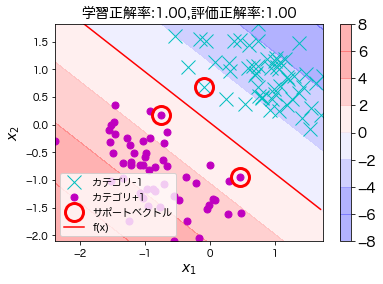

In [4]:
#-------------------
# 6. 真値と予測値のプロット
myModel.plotModel2D(X=Xtr,Y=Ytr,spptInds=myModel.spptInds,xLabel=myData.xLabel,yLabel=myData.yLabel,
    title=f"学習正解率:{myModel.accuracy(Xtr,Ytr):.2f},評価正解率:{myModel.accuracy(Xte,Yte):.2f}",
    isLinePlot=True)
#-------------------